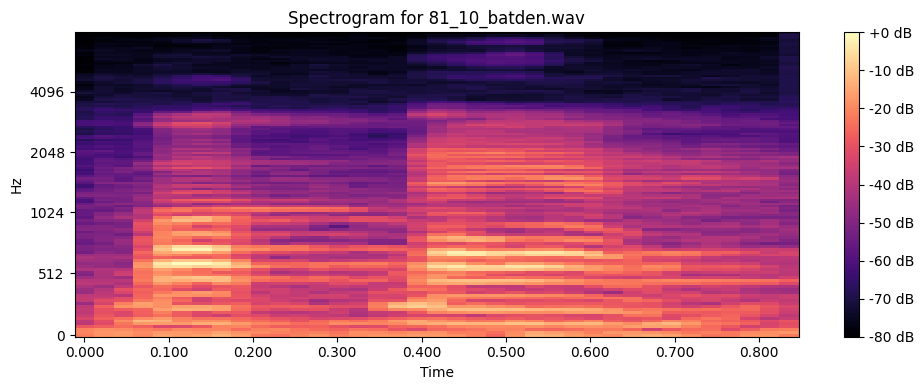

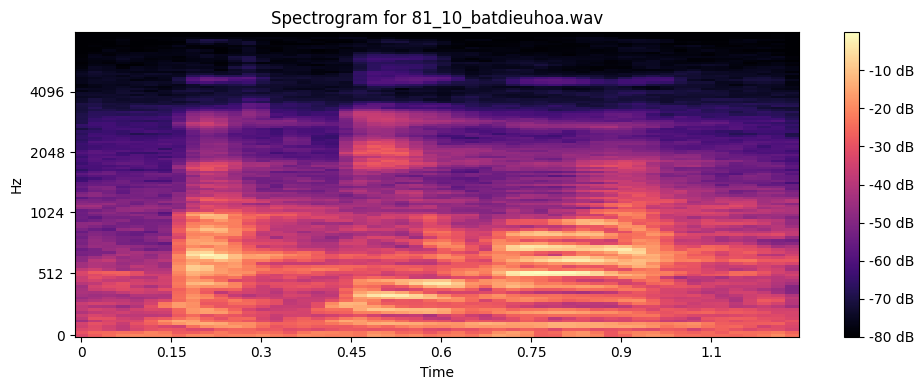

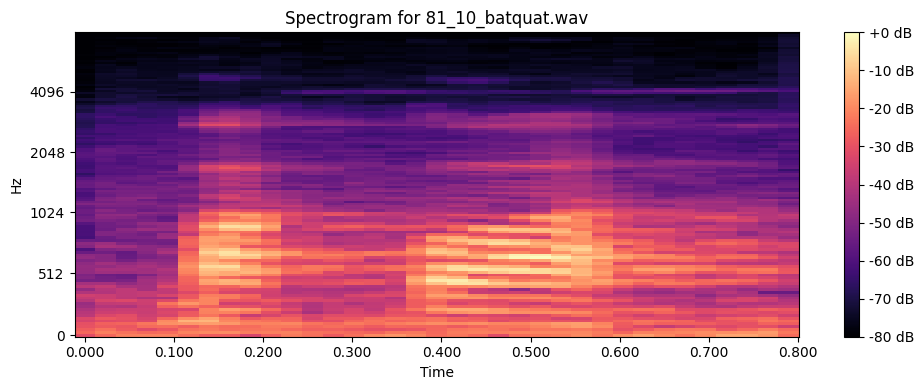

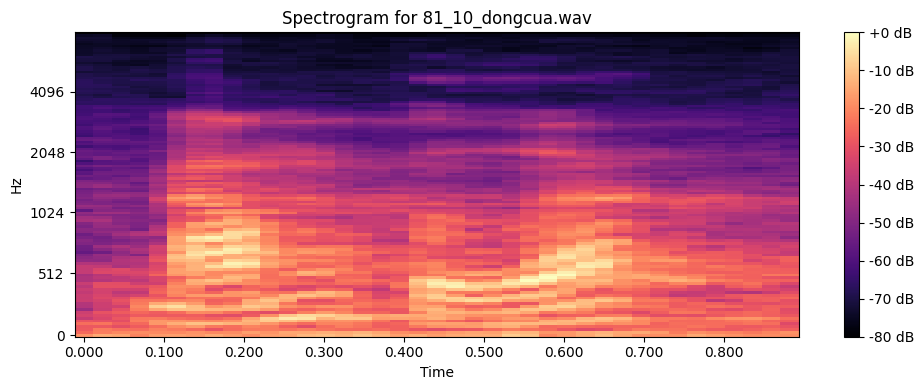

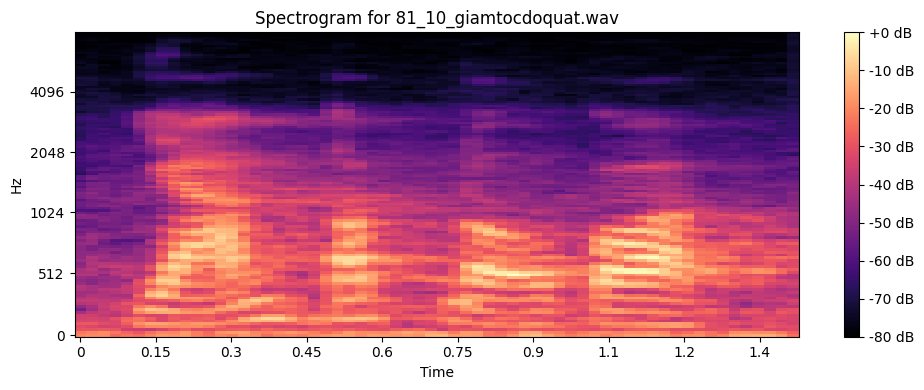

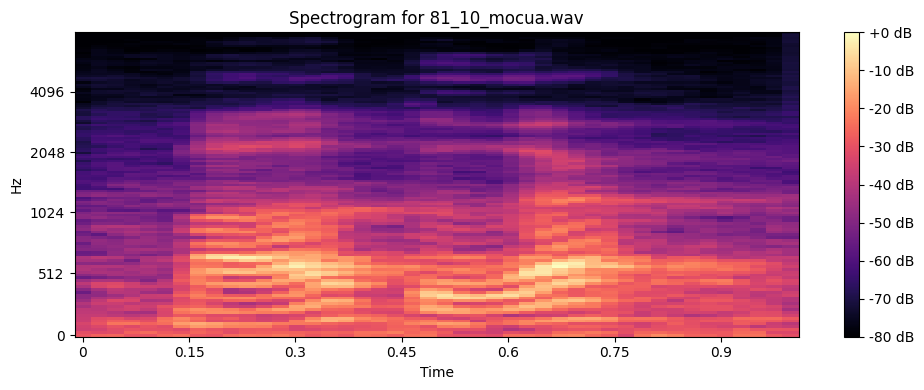

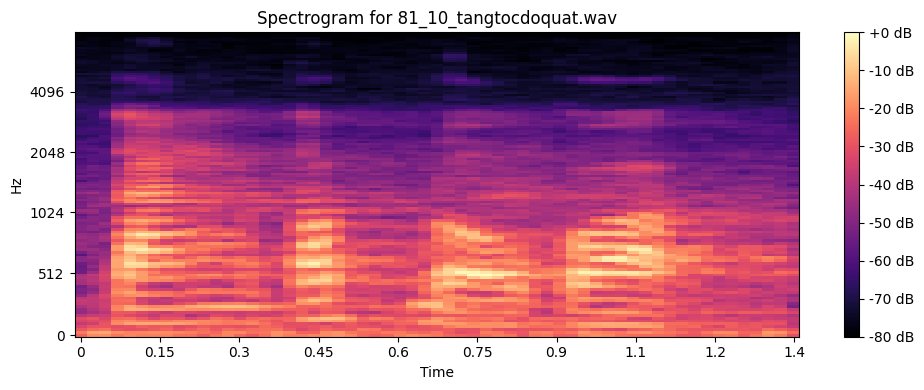

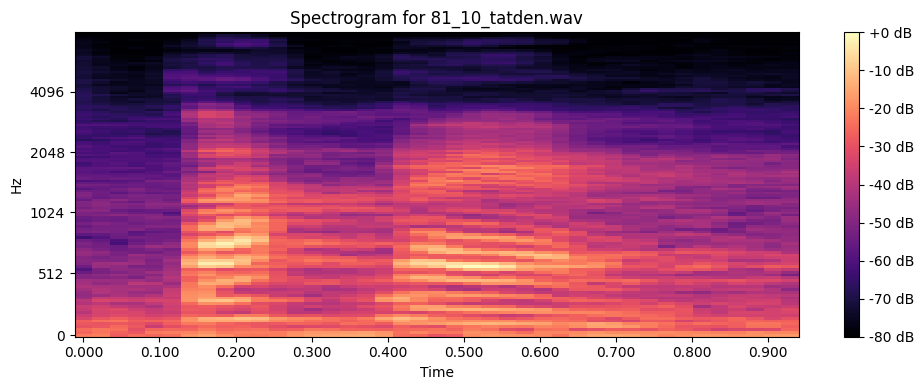

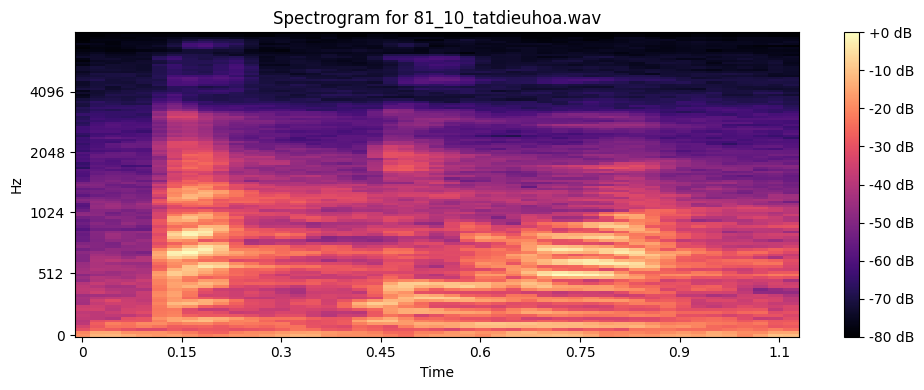

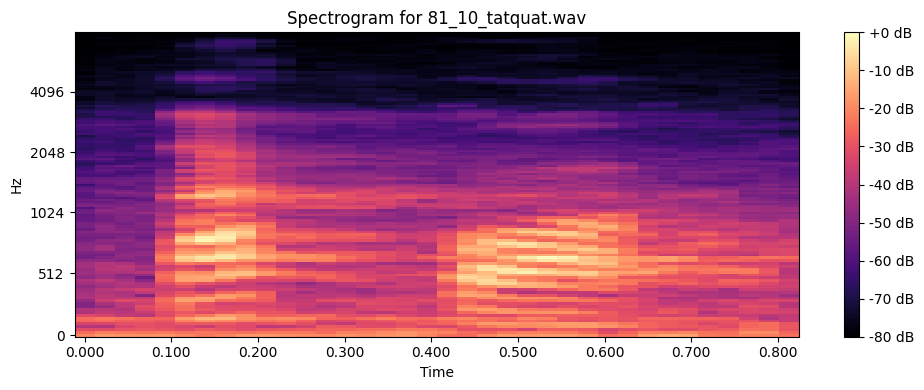

In [34]:
import os
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Set path to directory containing wav files
path_to_wav_files = '81_NHQ/10/'

# Set path to directory for saving spectrograms
path_to_spectrogram_dir = './81_NHQ/10_Spectogram/'

# Create spectrogram directory if it does not exist
if not os.path.exists(path_to_spectrogram_dir):
    os.makedirs(path_to_spectrogram_dir)

# Loop through all wav files in directory
for filename in os.listdir(path_to_wav_files):
    if filename.endswith('.wav'):
        # Load audio file
        audio, sr = librosa.load(os.path.join(path_to_wav_files, filename))

        # Compute spectrogram
        spec = librosa.feature.melspectrogram(y=audio, sr=sr)
        spec_db = librosa.power_to_db(spec, ref=np.max)

        # Plot and save spectrogram
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(spec_db, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spectrogram for {}'.format(filename))
        plt.tight_layout()
        plt.savefig(os.path.join(path_to_spectrogram_dir, '{}_spectrogram.png'.format(filename[:-4])))